# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [36]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [25]:
print(df_tesla.shape)
print(df_tesla.columns)
print(df_tesla.describe())
df_tesla.head() # periodiciy is monthly
largest = df_tesla['TSLA_WEB_SEARCH'].max()
smallest = df_tesla['TSLA_WEB_SEARCH'].min()

print(f'Largest value for Tesla in Web Search: {largest}')
print(f'Smallest value for Tesla in Web Search: {smallest}')

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [27]:
print(df_btc_search.shape)
print(df_btc_search.columns)
print(df_btc_search.describe())
df_btc_search.head() # periodiciy is daily
largest = df_btc_search['BTC_NEWS_SEARCH'].max()
smallest = df_btc_search['BTC_NEWS_SEARCH'].min()

print(f'Largest value for Bitcoin in Web Search: {largest}')
print(f'Smallest value for Bitcoin in Web Search: {smallest}')

(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
Largest value for Bitcoin in Web Search: 100
Smallest value for Bitcoin in Web Search: 3


In [23]:
print(df_btc_price.shape)
print(df_btc_price.columns)
print(df_btc_price.describe())
df_btc_price.head() # periodiciy is daily


(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [28]:
print(df_unemployment.shape)
print(df_unemployment.columns)
print(df_unemployment.describe())
df_unemployment.head() # periodiciy is monthly
largest = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
smallest = df_unemployment['UE_BENEFITS_WEB_SEARCH'].min()

print(f'Largest value for benefits in Web Search: {largest}')
print(f'Smallest value for benefits in Web Search: {smallest}')

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000
Largest value for benefits in Web Search: 100
Smallest value for benefits in Web Search: 14


Because the trend interest is normalized by dividing highest point, that means if something has a trend of 100 it is the max search volumn this topic has received.

Or more officially from google" Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [37]:

print(f'Missing values for Tesla?: {df_tesla.isna().values.any()} ')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()} ')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()} ')

Missing values for Tesla?: False 
Missing values for U/E?: False 
Missing values for BTC Search?: False 


In [38]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [39]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()} ')

Number of missing values: 2 


**Challenge**: Remove any missing values that you found.

In [41]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [50]:
# df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_btc_price['DATE'].head()

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

In [46]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [51]:
df_btc_price_monthly = df_btc_price.resample("M", on ="DATE").last()

In [105]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


# Data Visualisation

### Notebook Formatting & Style Helpers

In [56]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [84]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

In [87]:
# get locators on the x axis
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmr = mdates.DateFormatter("%Y")

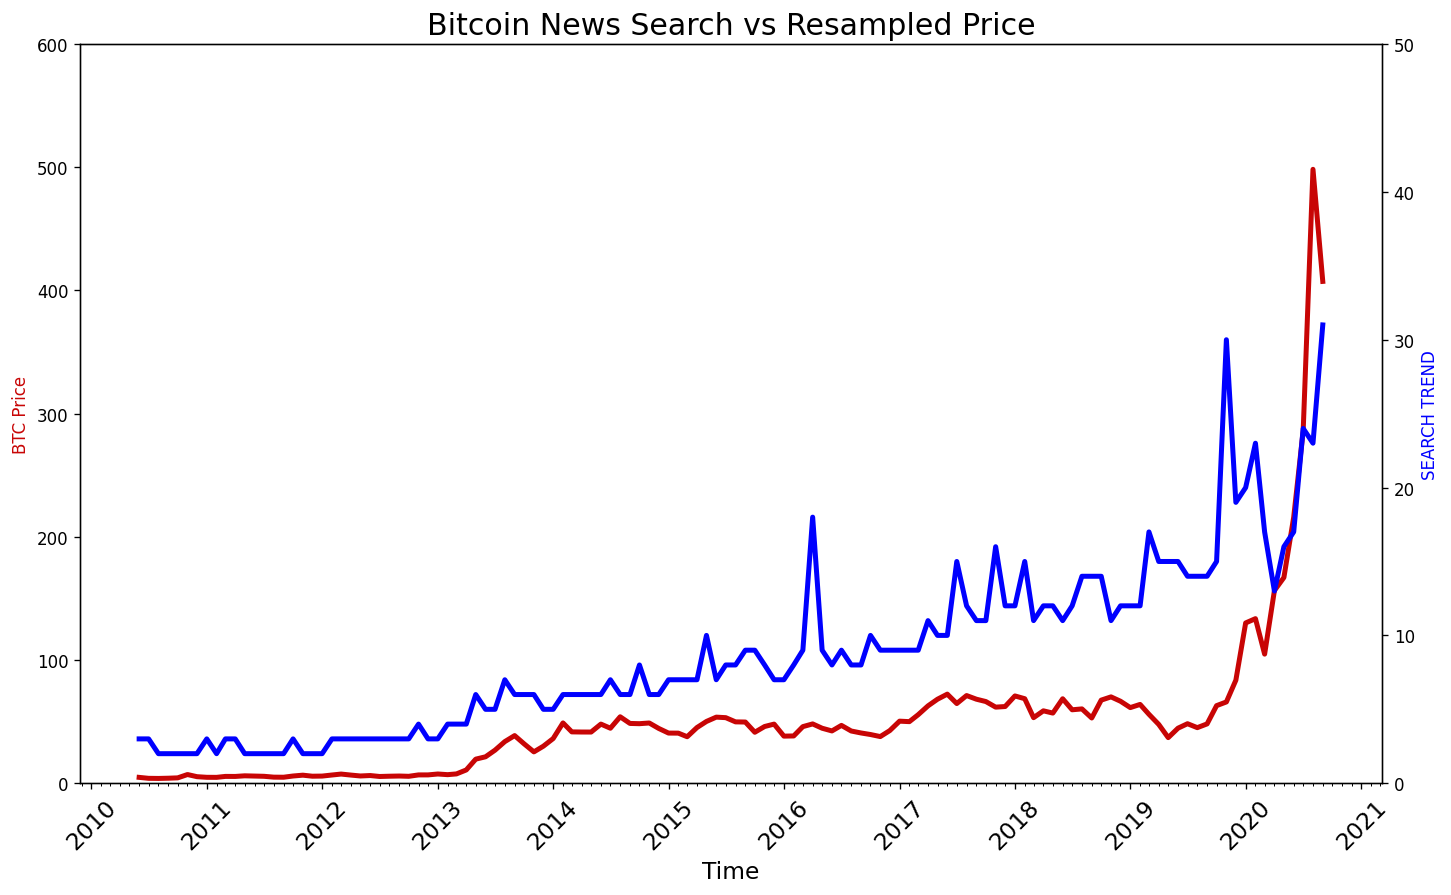

In [103]:

# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#C80505", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue', linewidth=3)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim([0, 600])
ax2.set_ylim([0, 50])
# ax2.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylabel("BTC Price", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()

# we see the march 2016 spike is related to model x unveil

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

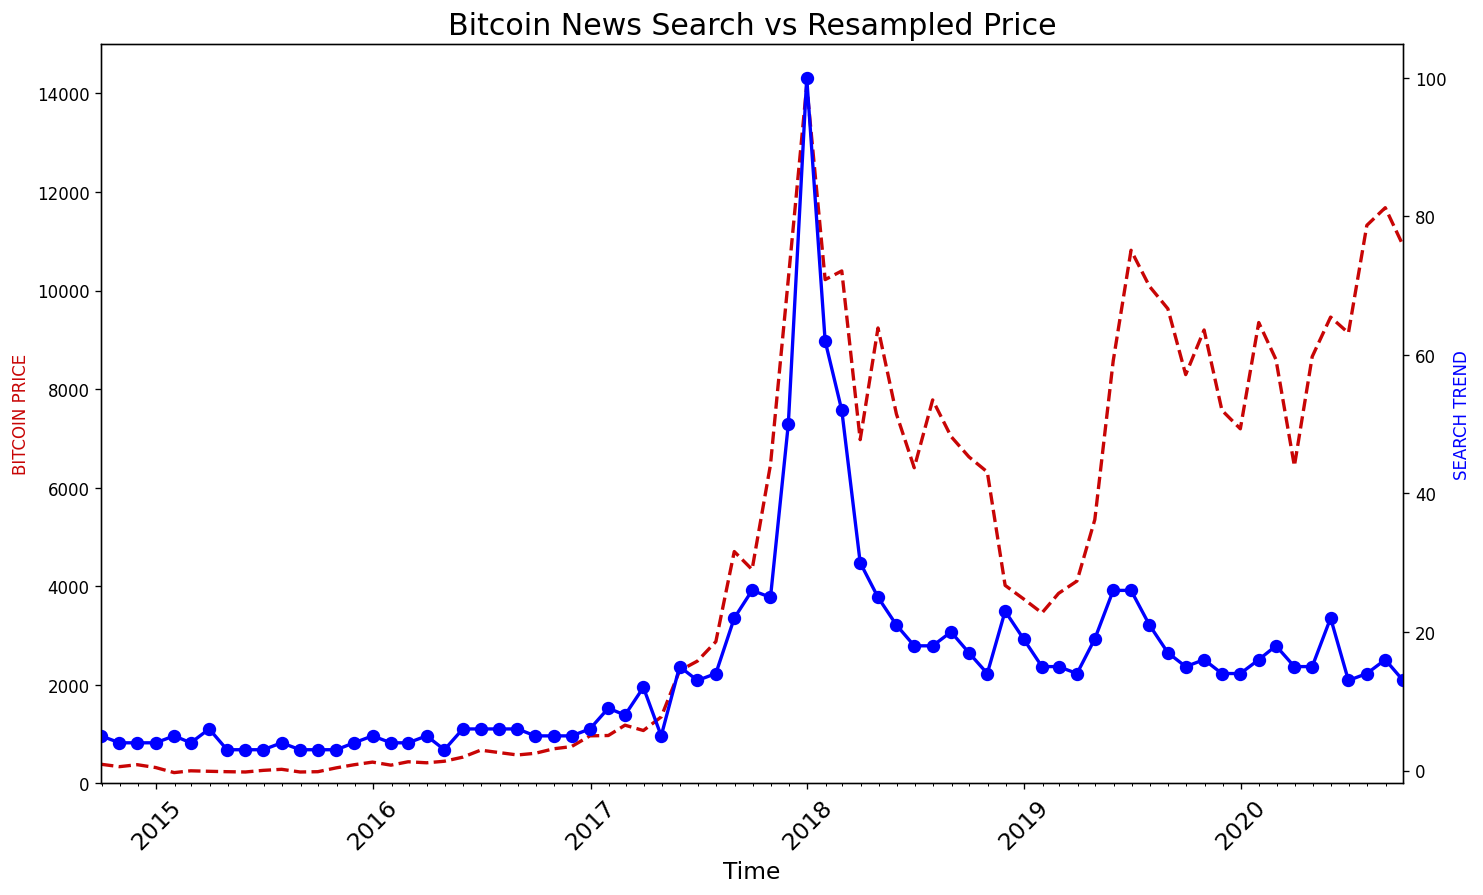

In [111]:
# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE, color="#C80505", linewidth=2,  linestyle='--')
ax2.plot(df_btc_price_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='blue', linewidth=2,  marker='o', markersize=7)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_price_monthly.index.min(), df_btc_price_monthly.index.max()])
ax1.set_ylabel("BITCOIN PRICE", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()




### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

In [113]:
df_unemployment.UNRATE.min()

3.7

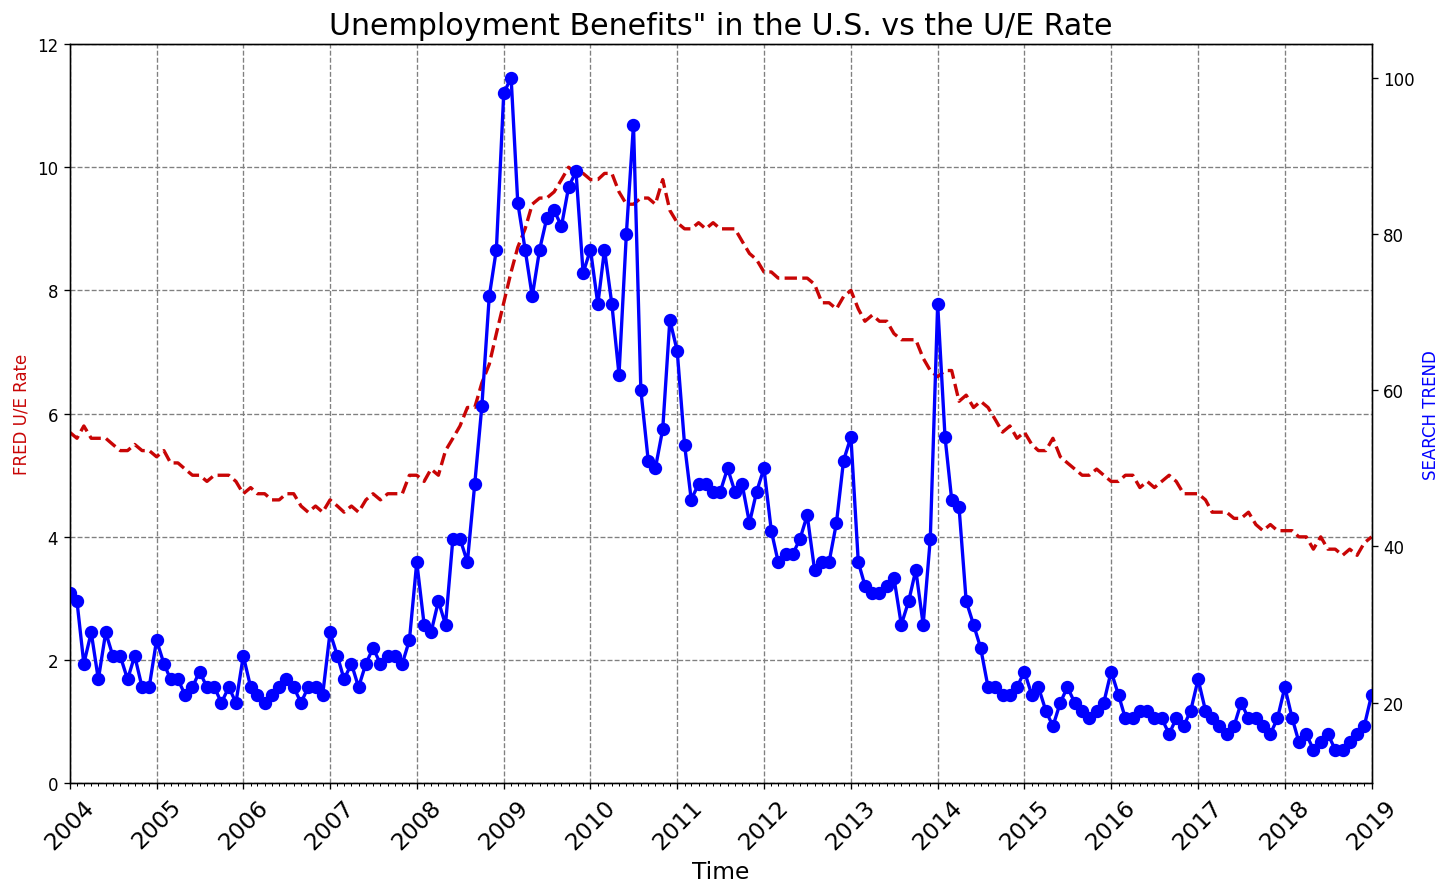

In [119]:
# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="#C80505", linewidth=2,  linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=2,  marker='o', markersize=7)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim(bottom=0, top=12)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylabel("FRED U/E Rate", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.grid(color='grey', linestyle='--')


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()

#search spikes at the end of the year, and at the financial crisis, it took alomsot 10 year to return the
# unemployment rate back to normal



**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


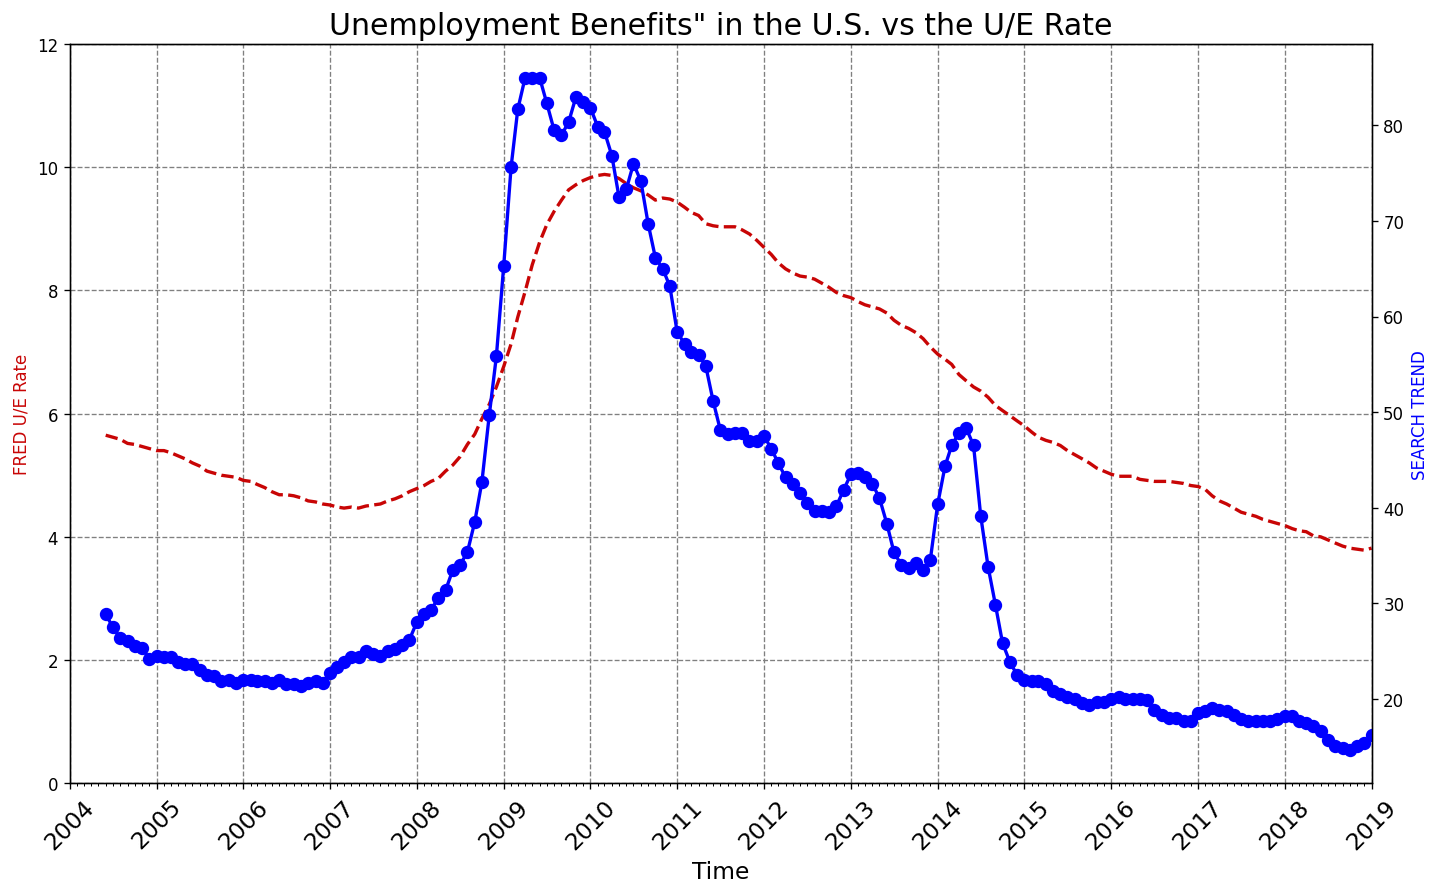

In [125]:
# beacuse the data is monthly
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="#C80505", linewidth=2,  linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=2,  marker='o', markersize=7)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim(bottom=0, top=12)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylabel("FRED U/E Rate", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.grid(color='grey', linestyle='--')


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()

#search spikes at the end of the year, and at the financial crisis, it took alomsot 10 year to return the
# unemployment rate back to normal
# search fot unemployment benefit happens before the actual rte goes up. (same for going down)
# could be used as economic indicator


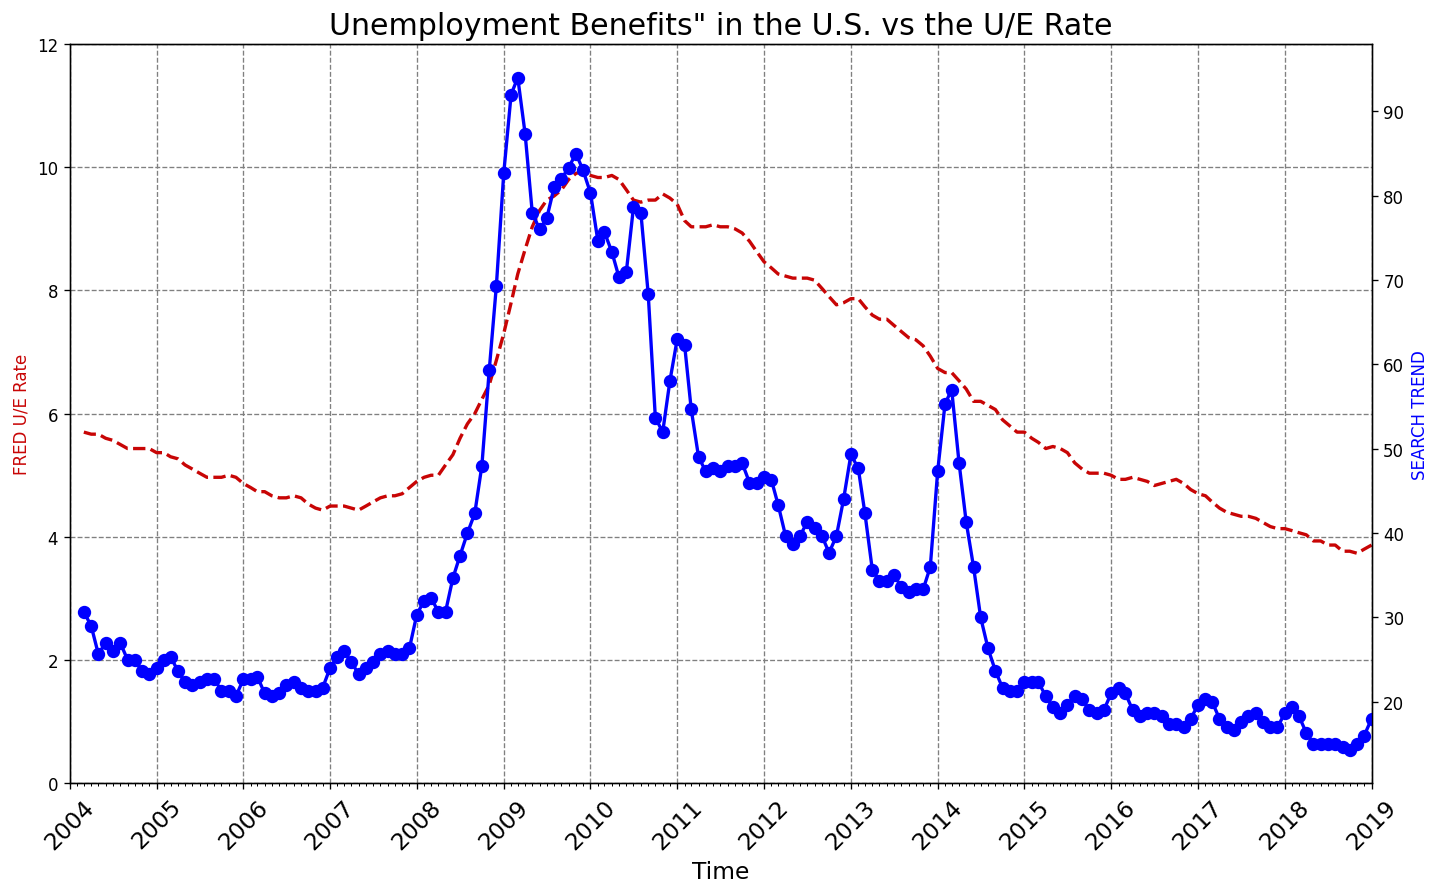

In [126]:
# beacuse the data is monthly
roll_df1 = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()
# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_unemployment.MONTH, roll_df1.UNRATE, color="#C80505", linewidth=2,  linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_df1.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=2,  marker='o', markersize=7)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim(bottom=0, top=12)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylabel("FRED U/E Rate", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.grid(color='grey', linestyle='--')


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()

#search spikes at the end of the year, and at the financial crisis, it took alomsot 10 year to return the
# unemployment rate back to normal



### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [127]:
df_unemployment_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_unemployment_20['MONTH'] = pd.to_datetime(df_unemployment_20['MONTH'])


In [129]:
roll_df1.UNRATE.max()

13.033333333333333

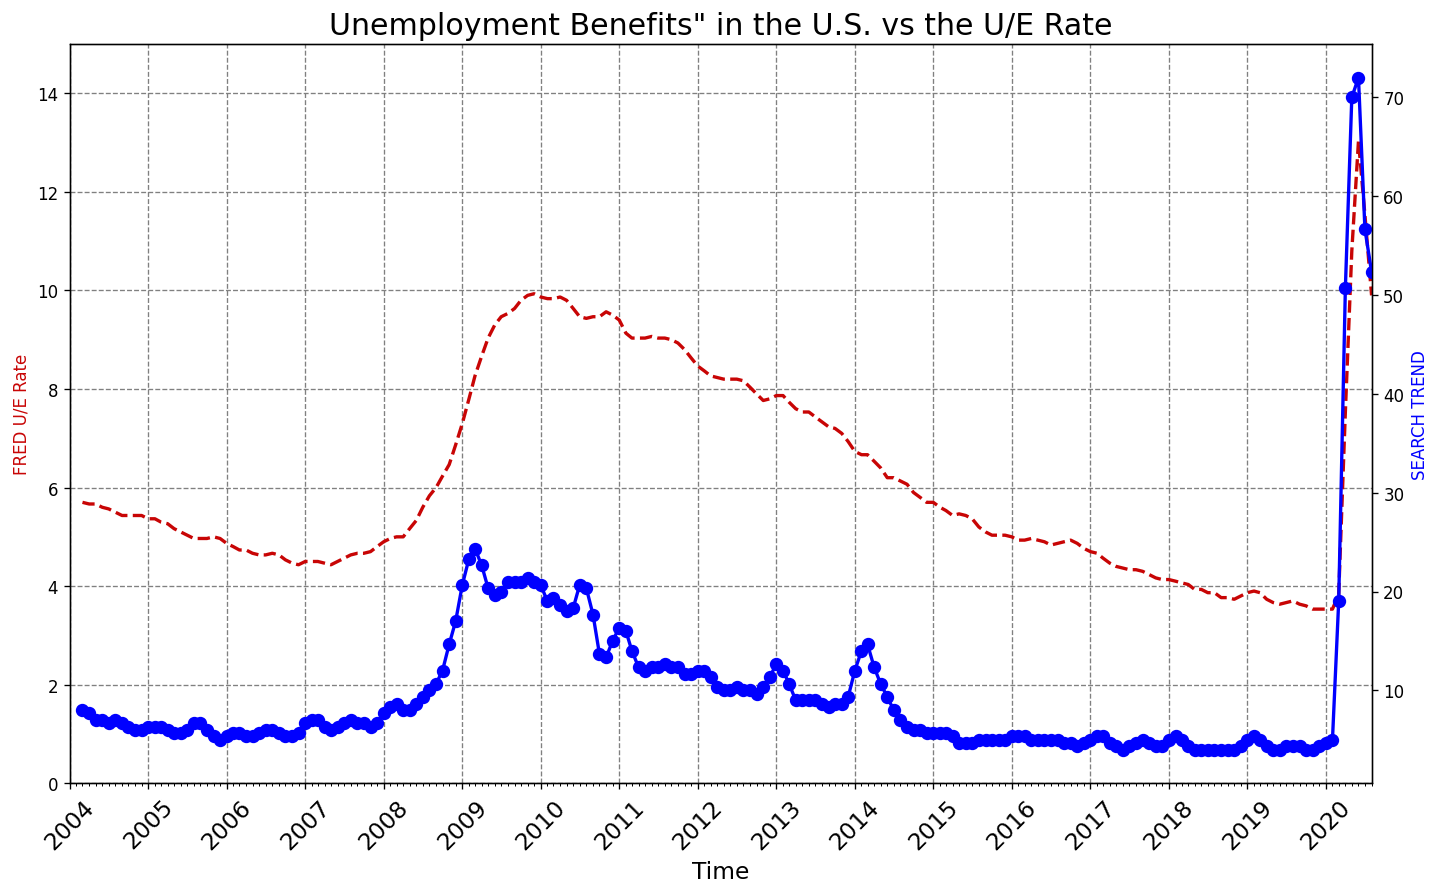

In [130]:
# beacuse the data is monthly
roll_df1 = df_unemployment_20[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()
# format the ticks

# Create locators for ticks on the time axis
plt.figure(figsize=(14, 8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.title('Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_unemployment_20.MONTH, roll_df1.UNRATE, color="#C80505", linewidth=2,  linestyle='--')
ax2.plot(df_unemployment_20.MONTH, roll_df1.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=2,  marker='o', markersize=7)
ax1.set_xlabel("Time", fontsize=14)
ax1.set_ylim(bottom=0, top=15)
ax1.set_xlim([df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max()])
ax1.set_ylabel("FRED U/E Rate", color="#C80505")
ax2.set_ylabel("SEARCH TREND", color='blue')

ax1.grid(color='grey', linestyle='--')


ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmr)
ax1.xaxis.set_minor_locator(months)
plt.show()

# 2020 covid 19, we see a peak of unemployment rate at a sudden rate